# Ciudad e ingeniería matemática... ¿qué tienen que ver?
Usualmente los problemas que son resueltos por ingenieros matemáticos son de gran utilidad para empresas de producción o para entidades financieras. Hoy, queremos mostrarles cómo un ingeniero matemático puede impactar positivamente en un ambiente de ciudad, y cómo cualquier problema puede ser tratado desde la perspectiva de un modelo matemático.

## Lo que está en tendencia
El aprendizaje de máquina es un área de estudio relativamente nueva y que actualmente cuenta con uno de los mayores presupuestos para investigación. Su utilización puede llegar a ser clave a la hora de resolver los nuevos problemas del mundo. 

* ¿Qué es inteligencia?
* ¿Qué saben de inteligencia artificial?
* ¿Qué problemas podríamos resolver con Aprendizaje de Máquina?

# Introducción al Aprendizaje de Máquina
**María Camila Vásquez Correa**

## ¿Qué es el aprendizaje de máquina?

El aprendizaje de máquina es la ciencia de programar computadores de tal manera que puedan _aprender de_ los datos.

Aquí hay una definición más general:
>[El aprendizaje de máquina es el] campo de estudio que le da a los computadores la habilidad de aprender sin necesidad de ser programados explícitamente. —Arthur Samuel, 1959

## ¿Por qué usar Aprendizaje de Máquina?
¿Cómo escribiríamos un filtro de Spam con métodos de programación tradicionales?

1. Primero veríamos cómo lucen los correos de Spam. Quizá notemos que algunos remitentes (como "Instragram" o "Facebook") tienden a enviar mucho Spam. Quizá hay algunos otros patrones, como el contenido del correo o el asunto.
2. Escribiríamos un algoritmo que, cuando vea estos patrones, envíe los correos a Spam.

Como el problema no es trivial, el programa probablemente se llenaría de una lista larguísima de reglas difícil de mantener y muy compleja.

* Para problemas en los cuales las soluciones requieren un montón de ajuste manual o largas listas de reglas: un algoritmo de aprendizaje de máquina puede con frecuencia simplificar el programa y hacerlo mejor.
* Ambientes cambiantes: Un sistema de aprendizaje de máquina puede ser adaptado fácilmente a nuevos datos.

## Tipos de Sistemas de Aprendizaje de Máquina

### Aprendizaje Supervisado
Aquí, los datos de entrenamiento para el algoritmo tienen la solución deseada, llamada etiqueta. 

Una tarea supervisada típica es la clasificación. Un filtro de Spam es un buen ejemplo: está entrenado con muchos ejemplos de correos con su clase (Spam o no Spam) y debe aprender cómo clasificiar nuevos correos.

Otra tarea común es predecir un valor numérico: el precio de un carro, dadas unas características, como el kilometraje, el año, la marca entre otros. Esta tarea se llama regresión.

### Aprendizaje no supervisado
Los datos para estos sistemas no están etiquetados. El sistema trata de aprender sin un instructor. 

Por ejemplo, podemos poner datos provenientes de dos especies diferentes. El sistema debería, entonces, intentar clasificar nuevos datos en los grupos formados por ambas especies, sin saber qué especie es cuál.

### Aprendizaje Semisupervisado
### Aprendizaje por refuerzo

**Caso ideal**: Conocemos de dónde vienen los datos, por tanto, podemos calcular nuestro modelo

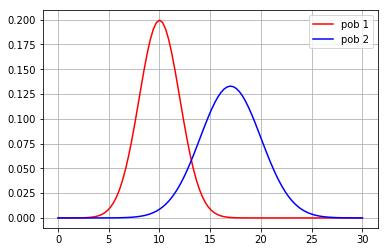

In [1]:
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

d1 = stats.norm(loc=10,scale=2)
d2 = stats.norm(loc=17,scale=3)

x = np.linspace(0,30,100)
plt.plot(x, d1.pdf(x), color="red", label="pob 1")
plt.plot(x, d2.pdf(x), color="blue", label="pob 2")
plt.grid()
plt.legend();

optimal boundary 13.15


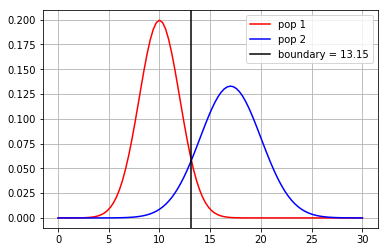

In [4]:
x = np.linspace(5,25,1000)
minx = x[np.argmin(np.abs(d1.pdf(x)-d2.pdf(x)))]

print("optimal boundary %.2f" % minx)

x = np.linspace(0,30,100)
plt.plot(x, d1.pdf(x), color="red", label="pop 1")
plt.plot(x, d2.pdf(x), color="blue", label="pop 2")
plt.axvline(minx, color="black", label=u"boundary = %.2f"%minx)
plt.grid()
plt.legend();

In [3]:
print('pob 1 error', 1-d1.cdf(minx))
print('pob 2 error', d2.cdf(minx))

pob 1 error 0.05773516274534907
pob 2 error 0.09957961739117976


**Caso real**: Solo tenemos muestras de los datos:
* ¿Cómo determinamos dónde poner el borde?
* ¿Qué clase de borde obtendremos?

In [10]:
import Utils.mlutils as mlutils 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

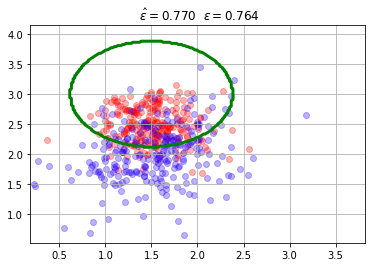

In [11]:
# Caso ideal
mc = mlutils.Example_Bayes2DClassifier(mean0=[1.5, 2.5], cov0=[[0.1, 0.], [0., 0.1]],
                                        mean1=[1.5, 2.], cov1=[[0.2,0.1],[0,.2]])
X,y = mc.sample(500)
mlutils.plot_2Ddata_with_boundary(mc.predict, X, y, line_width=3, line_color="green", dots_alpha=.3)
plt.title(" $\hat{\epsilon}=%.3f$"%mc.score(X,y)+"  $\epsilon=%.3f$"%mc.analytic_score());
plt.grid();

En general sólo tenemos **una muestra**, pues no sabemos de dónde vienen los datos.

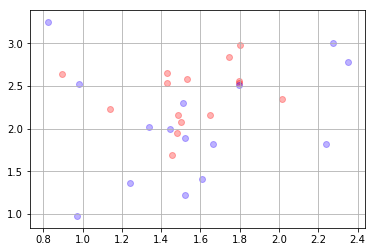

In [12]:
X,y = mc.sample(30)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
plt.grid()

* Los algoritmos de aprendizaje de máquina calculan los bordes entre los datos.
Por tanto, estamos **ciegos**. Así que tendremos que tener:
* Un buen algoritmo.
* Un método que mida cómo se ajusta.

4it [00:08,  2.24s/it]


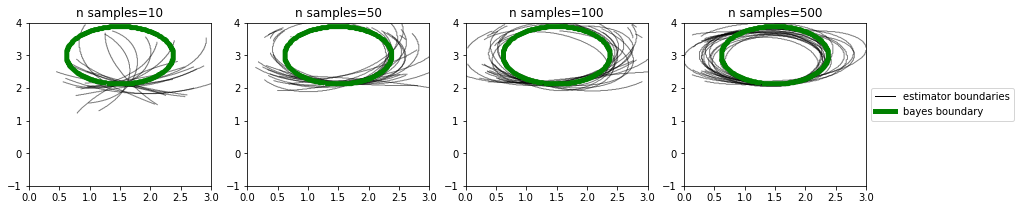

In [13]:
# Stability

estimator = SVC(gamma=.5)
mlutils.sample_borders(mc, estimator, samples = [10,50,100,500], n_reps=20, mins=[0,-1], maxs=[3,4])

### Sólo un conjunto de datos
¿Qué tan bien podemos generalizar nuevos casos?

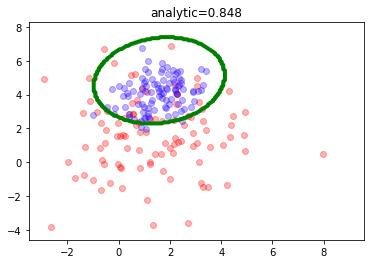

In [14]:
dataset_size = 200
mc = mlutils.Example_Bayes2DClassifier(mean0=[1.5, 1.5], cov0=[[4., 0.5], [0.1, 4.]],
                                        mean1=[1.5,4.], cov1=[[1,0.5],[0.1,1.]])
X,y = mc.sample(dataset_size)
mlutils.plot_estimator_border(mc, n_samples=dataset_size, legend=False)
analitic_score = mc.analytic_score()

### Conjunto de entrenamiento/prueba
Normalmente dividimos nuestros datos en dos conjuntos: entrenamiento y prueba. 

In [15]:
test_pct = .3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_pct)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(140, 2) (140,)
(60, 2) (60,)


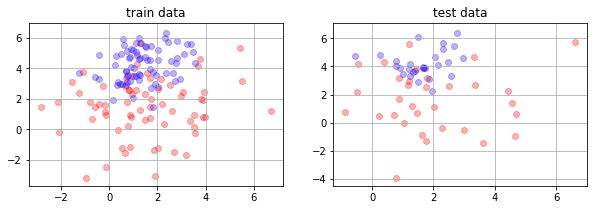

In [17]:
plt.figure(figsize=(10,3))
plt.subplot(121)
mlutils.plot_2Ddata(X_train, y_train, dots_alpha=.3)
plt.title("train data")
plt.grid()
plt.subplot(122)
mlutils.plot_2Ddata(X_test, y_test, dots_alpha=.3)
plt.grid()
plt.title("test data")
plt.show()

In [18]:
#estimator = SVC(gamma=1)
estimator = SVC(gamma=100)
#estimator = LogisticRegression()
#estimator = RandomForestClassifier()
#estimator = DecisionTreeClassifier(max_depth=3)
estimator.fit(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_pct)
estimator.fit(X_train, y_train)
trsc = estimator.score(X_train, y_train)
tssc = estimator.score(X_test, y_test)
print("train_score %5.2f" % estimator.score(X_train, y_train))
print("test_score  %5.2f" % estimator.score(X_test, y_test))

train_score  1.00
test_score   0.58


(0.8586, 0.1414)

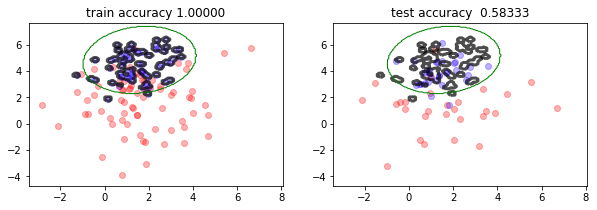

In [19]:
plt.figure(figsize=(10,3)); plt.subplot(121)
mlutils.plot_2Ddata(X_train, y_train, dots_alpha=.3)
mlutils.plot_2D_boundary(estimator.predict, np.min(X, axis=0), np.max(X, axis=0), line_width=3, line_alpha=.7, label=None)
plt.title("train accuracy %.5f"%estimator.score(X_train, y_train))
mlutils.plot_2D_boundary(mc.predict, np.min(X, axis=0), np.max(X, axis=0), line_width=1, line_alpha=1., line_color="green", label="bayes boundary")
plt.subplot(122)
mlutils.plot_2Ddata(X_test, y_test, dots_alpha=.3)
mlutils.plot_2D_boundary(estimator.predict, np.min(X, axis=0), np.max(X, axis=0), line_width=3, line_alpha=.7, label=None)
plt.title("test accuracy  %.5f"%estimator.score(X_test, y_test))
mlutils.plot_2D_boundary(mc.predict, np.min(X, axis=0), np.max(X, axis=0),line_width=1, line_alpha=1., line_color="green", label="bayes boundary")

# Redes Neuronales

Una red neuronal es un algoritmo bio-inspirado que toma una serie de entradas y las transforma en una salida. El perceptrón es el más sencillo de este tipo de algoritmos, inventado en 1957 por Frank Ronsenblatt.

![](img/neuron.jpeg)

In [20]:
%matplotlib inline
import numpy as np
import warnings
import matplotlib.pyplot as plt
import Utils.mlutils as mlutils
warnings.filterwarnings('ignore')
from sklearn.datasets import *
from sklearn.linear_model import Perceptron

(0.296275, 0.703725)

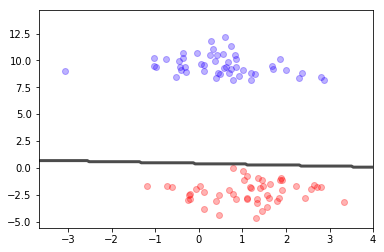

In [21]:
X, y = make_blobs(100, centers=2, cluster_std=1)

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(per_clf.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

## Red Neuronal Pre-alimentada
![](img/NN-with-components-w11-etc.png)

### Arquitectura
* Capa inicial.
* Capas ocultas.
* Capa de salida.

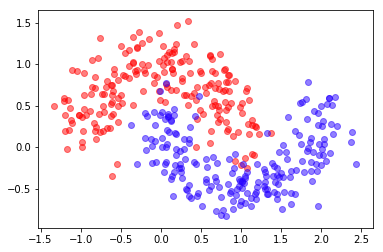

In [23]:
from Utils.lect5 import *

X,y = make_moons(400, noise=.2)
mlutils.plot_2Ddata(X,y)

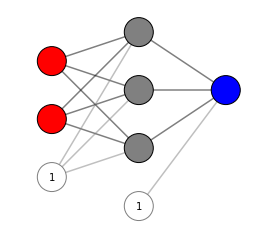

In [24]:
slp = SLP(h_units=3)
slp.fit(X,y)
slp.draw()

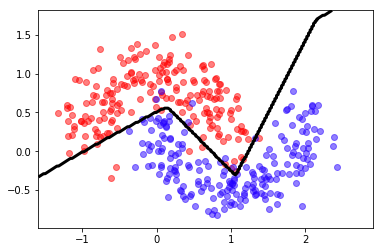

In [25]:
mlutils.plot_2Ddata_with_boundary(slp.predict, X,y);

# Modelos de clasficación

## Visión por computador
Las imágenes son la materia oscura de Internet. Estamos llenos de ellas, pero los computadores sólo las ven como matrices de números. ¿Cómo podemos utilizar esta inmensa cantidad de datos que está siendo generada cada segundo para solucionar problemas?

## Clasificación de imágenes
¡Reconocimiento de placas! Es un problema que involucra visión por computador y aprendizaje de máquina.

#### Paso 1: Extraer la placa de la imagen
![](img/LP0.png)

#### Paso 2: Extraer los caracteres de las placas
![](img/LP4.jpg)

#### Paso 3: Clasificar los caracteres
Utilizamos, para esto, un perceptrón de dos capas

![](img/LP3.jpg)

Que nos dio un resultado como este:

![](img/LP1.jpg)

Hay muchas formas de hacer esto, ¿qué otra se les ocurre?

# Modelos de detección de objetos

Estos modelos son ligeramente más complicados, pero pueden ser pensados como extraer cada cuadro de una imagen y decir qué se ve: un gato, un carro, una persona.

Este es el modelo en el que estoy trabajando:

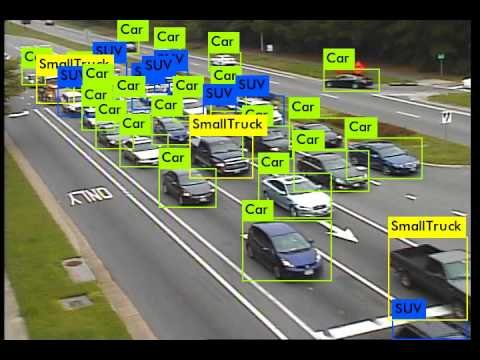

In [31]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('QccQXHiyE5g')

## Single Shot Detector
* Propuesta de regiones
* Clasificación

![](img/ssd1.png)